In [76]:
# Importing dependencies

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

# Problem 1:

In this section, we simulate the equations (1) and (2) given in the question set in order to understand the omitted variable bias.

Equation (1):  
$$
Y(i) = \alpha + \beta x_i + \gamma w_i + \delta z_i + \varepsilon_i
$$

Equation (2):  
$$
Y(i) = \alpha + \beta x_i + \gamma w_i + \mu_i
$$


##### Part a. 

It is given that $ \varepsilon_i $ follows the standard OLS Assumptions. We work with the following assumptions of the error distribution:

1. Error $ \varepsilon_i $ follows a normal distribution ~ $ N (0,\sigma^2) $
2. $ \varepsilon_i $ is exogenous - Mean of $ \varepsilon_i $ is independent of $ X_i $
    - That is $ E [\varepsilon_i | X_i] = 0 $
3. $ \varepsilon_i $ has a constant variance: $ Var[\varepsilon | X] = \sigma^2 $


Now, given, that Equation (2) omits variable $ z_i $, we can say that the error $ \mu_i $ can be represented as $ \mu_i = \delta z_i + \varepsilon_i $

Now, lets check whether the exogeneity assumption satisfies for $ \mu_i $. 

$$

E[\mu_i | x_i, w_i] = E[\delta z_i + \varepsilon_i | x_i, w_i]

$$
$$

\implies \delta E[z_i | x_i, w_i] + E[\varepsilon_i | x_i, w_i]

$$

We know that $\varepsilon_i$ is exogenous. Therefore $E[\varepsilon_i | x_i, w_i] = 0$. 

But, $E[z_i | x_i, w_i] = 0$ iff $\rho(zi, (xi,wi)) = 0$. That is if $z_i$ is uncorrelated with both $x_i$ and $w_i$. Otherwise $E[z_i | x_i, w_i] \neq 0$


Thus the exogeneity assumption breaks down in the error of Equation (2). 

The vairance of $\mu_i$ will be as follows: 

$$

Var(\mu_i) = Var(\delta z_i + \varepsilon_i)

$$

$$

\implies \delta^2 Var(z_i) + Var(\varepsilon_i) + 2 Cov (z_i, \varepsilon_i)

$$

We know that $Var(\varepsilon_i) = \sigma^2$. Even if the $Cov(z_i, \varepsilon_i) = 0$, the $Var(\mu_i)$ increases by $\delta^2 Var(z_i)$

Thus the constant variance assumption breaks down for $\mu_i$ as well. 

##### Part b and c.

**Effect of exogeneity failure on $\alpha$ , $\beta$ and $\delta$ :** 

We know that OLS provides the Best Linear Unbiased Estimators under the Gauss Markov Assumptions. We have considered the Gauss Markov Assumptions for equation 1. Hence we can call the estimated parameters $\phi = (\alpha, \beta, \gamma)$, BLUE. Being Blue means that the parameter estimated is unbiased and has the lowest variance(best). 

Further, for an estimator to be unbiased, the necessary condition is that the exogeneity assumption is satisfied. From part a, we saw that the exogeneity assumption is satisfied only under certain conditions, where the observed values are uncorrelated.

**Effect on $\alpha$:**

Since the constant term is chosen to be 1 in our case, it is uncorrelated with the other observed values of $x_i$ and $w_i$. So we can safely say that the $\alpha$ parameter estimated from equation 1 and equation 2 will be unbiased. However, due to an inflated variance of $\mu$ in equation 2, we see that the variance of the estimated $\alpha$ in equation 2 is higher than in equation 1.

**Effect on $\beta$:**

$\beta$ will be unbiased iff $E[z_i | x_i] = 0$, that is $x_i$ and $z_i$ are uncorrelated. Regardless, the estimated $\beta$ parameter from equation 2 will have a higher variance. We construct a Monte Carlo Simulation with correlated $x_i$ $w_i$ and $z_i$, to capture the effect of omitted variable on the estimated parameter bias.

**Effect on $\delta$:**

Equation 1 estimates BLUE estimates of $\delta$, since $\varepsilon_i$ follows Gauss Markov Assumptions, and equation 2, does not estimate it. The effect of this parameter is captured in the error $\mu_i$. 

In [57]:
# Creating a Monte Carlo Simulation to show Ommitted Variable Bias

# Setting seed for reproducibility
np.random.seed(42)

n = 1000 # sample size
B = 1000 # number of simulations

# Setting true value of parameters
alpha = 1
beta = 3.5
gamma = 5
delta = 2.6

# Initiating list for the estimated parameters for the correct model
beta_estimates_1 = []
gamma_estimates_1 = []
alpha_coeff_1 = []


# Initiating list for the estimated parameters for the misspecified model
beta_estimates_2 = []
gamma_estimates_2 = []
alpha_coeff_2 = []

# Creating Monte Carlo simulations

for b in range(B):

    # Generating the Variables
    X = np.random.normal(0,1,n) # Creating a hypothetical observed value of X
    W = np.random.normal(0,1,n) # Creating a hypothetical observed value of W
    Z = 0.5 * X + 0.2 * W + np.random.normal(0,1,n) # Creating a hypothetical observed value of Z, depending on X and W, also random element for avoiding perfect multicollinearity
    epsilon = np.random.normal(0,1,n) # Epsilon following standard OLS assumptions

    # True Model
    Y = alpha + beta * X + gamma * W + delta * Z + epsilon

    # Creating a Dataframe for use
    data = pd.DataFrame({'Y': Y, 'X': X, 'W': W, 'Z': Z})

    # Fitting the True Model to get the estimates 

    controls = data[['X', 'W', 'Z']]
    depvar = data['Y']
    controls = sm.add_constant(controls)

    model_true = sm.OLS(depvar, controls).fit()
    beta_estimates_1.append(model_true.params[1])
    gamma_estimates_1.append(model_true.params[2])
    alpha_coeff_1.append(model_true.params[0])

    # Fitting the Misspecified Model to get the estimates

    controls_false = data[['X', 'W']]
    depvar_false = data['Y']
    controls_false = sm.add_constant(controls_false)

    model_false = sm.OLS(depvar_false, controls_false).fit()
    beta_estimates_2.append(model_false.params[1])
    gamma_estimates_2.append(model_false.params[2])
    alpha_coeff_2.append(model_false.params[0])

# Appending to df

df = pd.DataFrame({
    "Correct Alpha": alpha_coeff_1,
    "Correct Beta": beta_estimates_1,
    "Correct Gamma": gamma_estimates_1,
    "Omitted Alpha": alpha_coeff_2,
    "Omitted Beta": beta_estimates_2,
    "Omitted Gamma": gamma_estimates_2
})

# Creating summary table to record the mean and standard deviation of the estimated coefficients from 1000 simulations, to capture bias

summary_df = df.describe().T[['mean', 'std']].reset_index().rename(columns={'index': 'Coefficients'})

# Running a simple t-test to check whether the estimated coefficients are significantly biased

summary_df["true_val"] = [alpha, beta, gamma, alpha, beta, gamma]

summary_df["ttest"] = (summary_df["mean"] - summary_df["true_val"])/summary_df["std"]

# Printing the results for better understanding

for _, row in summary_df.iterrows():
    if abs(row['ttest']) > 1.96:
        print(f"{row['Coefficients']} is significantly biased at the 5% level.")

print(f"\n The summary of the estimated coefficients is:\n{summary_df}")

Omitted Beta is significantly biased at the 5% level.
Omitted Gamma is significantly biased at the 5% level.

 The summary of the estimated coefficients is:
    Coefficients      mean       std  true_val      ttest
0  Correct Alpha  1.000121  0.032122       1.0   0.003774
1   Correct Beta  3.500528  0.036530       3.5   0.014467
2  Correct Gamma  5.000122  0.031877       5.0   0.003833
3  Omitted Alpha  0.997468  0.086451       1.0  -0.029284
4   Omitted Beta  4.802827  0.088259       3.5  14.761425
5  Omitted Gamma  5.518642  0.089230       5.0   5.812426


Here we can see that after 1000 simulations, the estimated $\alpha$ in both cases is 1. The t-test with the null hypothesis that the estimated parameter is equal to the true value, fails to reject the null hypothesis for both the $\alpha$ s. Thus we can infer, that the omitted variable is not inducing bias, if the observed variables are uncorrelated. On the other hand, the $\beta$ and $\gamma$ coefficients for the "Correct" model gives unbiased estimates, whereas, for the misspecified model, significantly induces bias at the 5% level. This is because of our construction providing a positive correlation between $x_i$, $w_i$ and $z_i$. 

Unsurprisingly, for each coefficient in the "Omitted" model, the estimates have a higher variance, than the "Correct" model

##### Part d.

Generating independent random variables

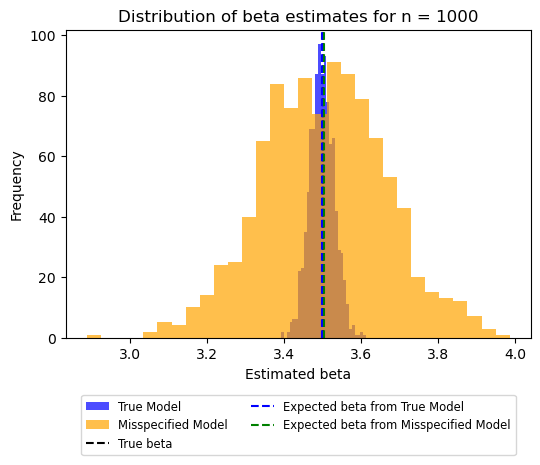

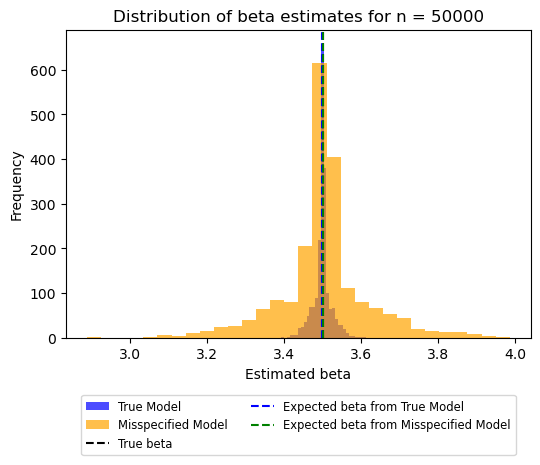

In [64]:
# Setting seed for reproducibility
np.random.seed(42)

n = [1000, 50000] # sample size
B = 1000 # number of simulations

# Setting true value of parameters
alpha = 1
beta = 3.5
gamma = 5

# Initiating list for the estimated parameters for the correct model
beta_estimates_1 = []


# Initiating list for the estimated parameters for the misspecified model
beta_estimates_2 = []

# Creating Monte Carlo simulations
for _ in n:

    for b in range(B):

        # Generating the Variables

        X = np.random.normal(0,1,_) # Creating a hypothetical observed value of X

        W = np.random.normal(0,1,_) # Creating a hypothetical observed value of W

        epsilon = np.random.normal(0,1,_) # Epsilon following standard OLS assumptions

        # True Model
        Y = alpha + beta * X + gamma * W + epsilon

        # Creating a Dataframe for use
        data = pd.DataFrame({'Y': Y, 'X': X, 'W': W})

        # Fitting the True Model to get the estimates 

        controls = data[['X', 'W']]
        depvar = data['Y']
        controls = sm.add_constant(controls)

        model_true = sm.OLS(depvar, controls).fit()
        beta_estimates_1.append(model_true.params[1])

        # Fitting the Misspecified Model to get the estimates

        controls_false = data[['X']]
        depvar_false = data['Y']
        controls_false = sm.add_constant(controls_false)

        model_false = sm.OLS(depvar_false, controls_false).fit()
        beta_estimates_2.append(model_false.params[1])


    plt.figure(figsize=(6, 4))
    plt.hist(beta_estimates_1, bins=30, alpha=0.7, label='True Model', color='blue')
    plt.hist(beta_estimates_2, bins=30, alpha=0.7, label='Misspecified Model', color='orange')
    plt.axvline(beta, color='black', linestyle='--', label='True beta')
    plt.axvline(np.mean(beta_estimates_1), color='blue', linestyle='--', label='Expected beta from True Model')
    plt.axvline(np.mean(beta_estimates_2), color='green', linestyle='--', label='Expected beta from Misspecified Model')
    plt.title(f'Distribution of beta estimates for n = {_}')
    plt.xlabel('Estimated beta')
    plt.ylabel('Frequency')
    plt.legend(
    loc='lower center',
    bbox_to_anchor=(0.5, -0.4),
    fontsize='small',
    ncol=2
    )

We note that when the observed values of the variables are uncorrelated, the estimator $\beta$ is unbiased. But an interesting trend is noted when increasing the sample size from 1000 to 50000. When we increase the sample size, the estimated coefficients tend to get closer to the true value. This property is the consistency of the OLS estimator. Omitted variable does not tamper with the consistency of the OLS estimator, simply biases it, and increases its variance in the same sample size. We observe that when the sample size increases, the frequency of estimated parameters being close to the true value rises, the tails become flatter. We can say that $$\hat{\beta} \xrightarrow{n \to \infty} \beta$$

Generating correlated random variables

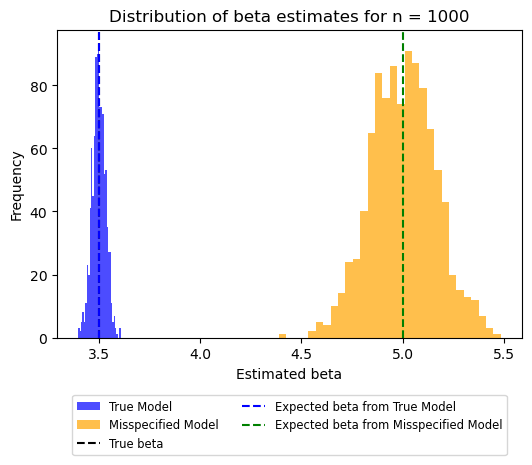

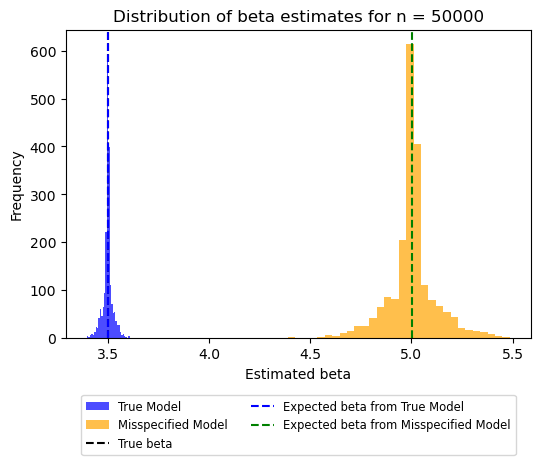

In [65]:
# Setting seed for reproducibility
np.random.seed(42)

n = [1000, 50000] # sample size
B = 1000 # number of simulations

# Setting true value of parameters
alpha = 1
beta = 3.5
gamma = 5

# Initiating list for the estimated parameters for the correct model
beta_estimates_1 = []


# Initiating list for the estimated parameters for the misspecified model
beta_estimates_2 = []

# Creating Monte Carlo simulations
for _ in n:

    for b in range(B):

        # Generating the Variables

        X = np.random.normal(0,1,_) # Creating a hypothetical observed value of X

        W = 0.3 * X + np.random.normal(0,1,_) # Creating a hypothetical observed value of W

        epsilon = np.random.normal(0,1,_) # Epsilon following standard OLS assumptions

        # True Model
        Y = alpha + beta * X + gamma * W + epsilon

        # Creating a Dataframe for use
        data = pd.DataFrame({'Y': Y, 'X': X, 'W': W})

        # Fitting the True Model to get the estimates 

        controls = data[['X', 'W']]
        depvar = data['Y']
        controls = sm.add_constant(controls)

        model_true = sm.OLS(depvar, controls).fit()
        beta_estimates_1.append(model_true.params[1])

        # Fitting the Misspecified Model to get the estimates

        controls_false = data[['X']]
        depvar_false = data['Y']
        controls_false = sm.add_constant(controls_false)

        model_false = sm.OLS(depvar_false, controls_false).fit()
        beta_estimates_2.append(model_false.params[1])


    plt.figure(figsize=(6, 4))
    plt.hist(beta_estimates_1, bins=30, alpha=0.7, label='True Model', color='blue')
    plt.hist(beta_estimates_2, bins=30, alpha=0.7, label='Misspecified Model', color='orange')
    plt.axvline(beta, color='black', linestyle='--', label='True beta')
    plt.axvline(np.mean(beta_estimates_1), color='blue', linestyle='--', label='Expected beta from True Model')
    plt.axvline(np.mean(beta_estimates_2), color='green', linestyle='--', label='Expected beta from Misspecified Model')
    plt.title(f'Distribution of beta estimates for n = {_}')
    plt.xlabel('Estimated beta')
    plt.ylabel('Frequency')
    plt.legend(
    loc='lower center',
    bbox_to_anchor=(0.5, -0.4),
    fontsize='small',
    ncol=2
    )

Again, due to construction we induce bias in the estimated coefficients due to the factors talked about above. Since we created $ W = 0.3 * X + N(0,1) $, there is an upward bias induced. Even in this case we see, raising the sample size makes the estimated $\beta$ converge to the mean (which is now biased). 

# Problem 6:

#### Dummy Variable Regression

The Average Root Mean Squared Error of Model 1 without a dummy variable is: 1.6555757753922227
The Average Root Mean Squared Error of Model 2 with a dummy variable is: 0.9108437392001528


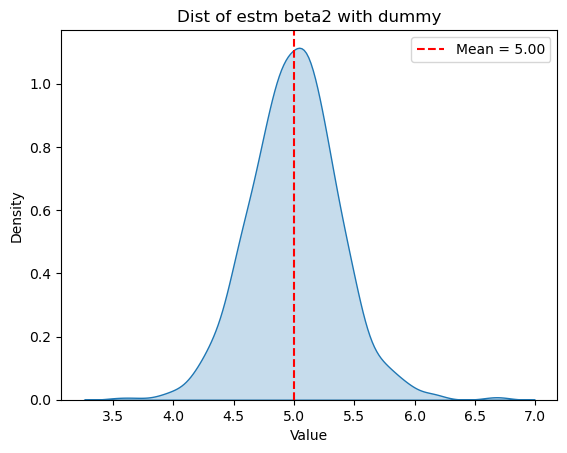

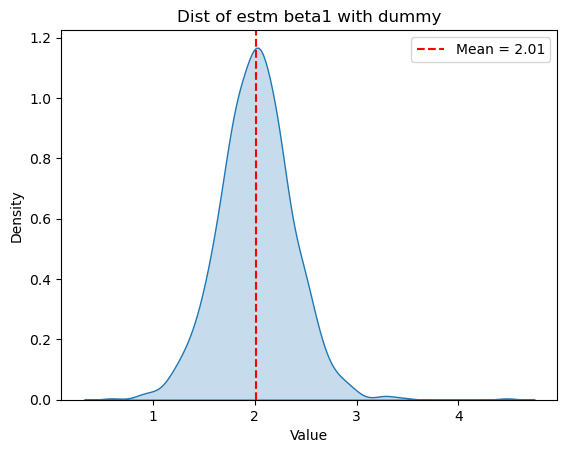

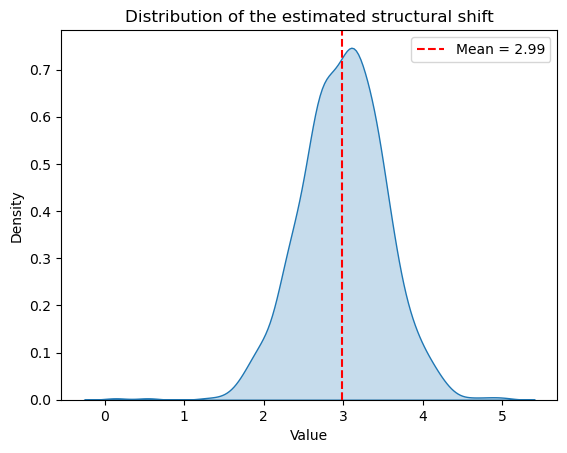

In [ ]:
np.random.seed(42)

T = 20
alpha = 1
beta1 = 2
beta2 = 5 # Adding a structural break

B = 1000 # number of simulations
timestamp = np.arange(1,T+1)


beta_model_1 = []
beta_1_model_2 = []
delta_model_2 = []
beta_2_model_2 = []
rmse_1_no_dummy = []
rmse_2_dummy = []


for _ in range(B):


    X = np.random.normal(0,1,T)

    beta = np.where(timestamp <= 10, beta1, beta2) # Adding a structural break to test later
    epsilon = np.random.normal(0,1,T) # error term
    Y = alpha + beta * X + epsilon # construction of Y

    # Creating a dataframe to simulate the actual effect. We dont construct the data, we generally get it. If we find a structural shift    

    df = pd.DataFrame({
        'timestamp': timestamp,
        'X': X,
        'Y': Y
    })                                  

    df["time_dummy"] = np.where(df["timestamp"] <= 10, 0, 1) # Creating a dummy variable for the timestamp <=10

    df["treatment_var"] = df["X"] * df["time_dummy"] # Dummy Variable Dt*Xt

    # Model 1: No Dummy

    control_no_dummy = df[["X"]]
    y_no_dummy = df["Y"]
    control_no_dummy = sm.add_constant(control_no_dummy)

    model_no_dummy = sm.OLS(y_no_dummy, control_no_dummy).fit()

    beta_no_dummy = model_no_dummy.params[1]

    y_pred_no_dummy = model_no_dummy.predict(control_no_dummy)
    rmse_no_dummy = np.sqrt(np.mean((y_no_dummy - y_pred_no_dummy)**2))

    beta_model_1.append(beta_no_dummy) 
    rmse_1_no_dummy.append(rmse_no_dummy)

    # Model 2: Dummy

    control_dummy = df[["X", "treatment_var"]]
    y_dummy = df["Y"]
    control_dummy = sm.add_constant(control_dummy)

    model_dummy = sm.OLS(y_dummy, control_dummy).fit()

    delta_dummy = model_dummy.params[2]
    beta_dummy = model_dummy.params[1]
    beta_2_dummy = beta_dummy + delta_dummy

    y_pred_dummy = model_dummy.predict(control_dummy)
    rmse_dummy = np.sqrt(np.mean((y_dummy - y_pred_dummy)**2))

    beta_1_model_2.append(beta_dummy)
    beta_2_model_2.append(beta_2_dummy)
    delta_model_2.append(delta_dummy)
    rmse_2_dummy.append(rmse_dummy)

# Printing the results

print(f"The Average Root Mean Squared Error of Model 1 without a dummy variable is: {np.mean(rmse_1_no_dummy)}")
print(f"The Average Root Mean Squared Error of Model 2 with a dummy variable is: {np.mean(rmse_2_dummy)}")

sns.kdeplot(beta_2_model_2, fill=True)
plt.axvline(np.mean(beta_2_model_2), color='red', linestyle='--', label=f'Mean = {np.mean(beta_2_model_2):.2f}')
plt.legend()
plt.title("Dist of estm beta2 with dummy")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

sns.kdeplot(beta_1_model_2, fill=True)
plt.axvline(np.mean(beta_1_model_2), color='red', linestyle='--', label=f'Mean = {np.mean(beta_1_model_2):.2f}')
plt.legend()
plt.title("Dist of estm beta1 with dummy")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

sns.kdeplot(delta_model_2, fill=True)
plt.axvline(np.mean(delta_model_2), color='red', linestyle='--', label=f'Mean = {np.mean(delta_model_2):.2f}')
plt.legend()
plt.title("Distribution of the estimated structural shift")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()